In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
import scipy.stats

In [2]:
def table(data, count):
    for i in data:
        data[i] = data[i] / count
    return data

In [3]:
def Map(data):#Ham map va dem so luong
    map_dict = {}
    sum_count = 0
    for i in data:
        if i in map_dict:
            map_dict[i] += 1
        else:
            map_dict[i] = 1
        sum_count += 1
        
    
    return table(map_dict, sum_count)

In [4]:
def expectation(data):
    E = 0
    
    for i in data:
        E += data[i] * i
    
    return E

In [5]:
def STD(data):
    E = expectation(data)
    std = 0
    
    for i in data:
        std += math.pow((i - E), 2) * data[i]
    
    return math.sqrt(std)

In [6]:
def gaussian_distribution(data_value, expectation, std):
    result = (1 / (std * math.sqrt(2 * math.pi))) * math.exp( - math.pow(data_value - expectation, 2) / ( 2 * math.pow(std, 2)))
    return result

In [7]:
pd.set_option('display.max_rows', None)
data = pd.read_csv('data.csv').sort_values(by=['age'])
result = data.copy()


In [8]:
map_dict = Map(data['age'])
E = expectation(map_dict)
std = STD(map_dict)


In [9]:
gaussian_list = []
for i in map_dict:
    gaussian_list.append(gaussian_distribution(i, E, std))



In [10]:
# result = data.copy()
# noise = round(40 + np.random.normal(0, 1))
# result.loc[result['age'] == 40, 'age'] = noise
# result=result.sort_values(by=['age'])
# map_dict_noise = Map(result['age'])
# E_noise = expectation(map_dict_noise)
# std_noise = STD(map_dict_noise)
# gaussian_noise_list = []
# for i in map_dict_noise:
#     gaussian_noise_list.append(gaussian_distribution(i, E_noise, std_noise))

In [11]:
data_40 = data.copy()
for i in range(len(data_40)):
    if(data_40.iat[i,0] == 40):
        data_40.iat[i,0] = round(np.random.normal(E, std * 0.5 + 1))

In [12]:
data_40 = data_40.sort_values(by='age')
map_dict_noise = Map(data_40['age'])
E_noise = expectation(map_dict_noise)
std_noise = STD(map_dict_noise)
gaussian_list_noise = []
for i in map_dict_noise:
    gaussian_list_noise.append(gaussian_distribution(i, E_noise, std_noise))

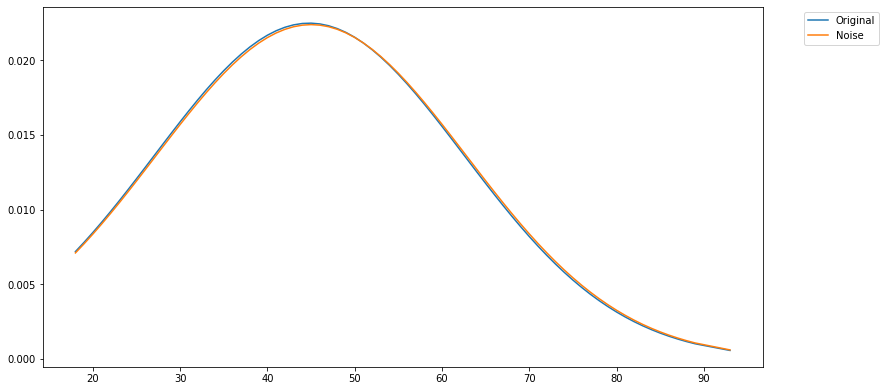

In [13]:

fig= plt.figure(figsize=(1,1))
axes= fig.add_axes([5,5,10,5])
axes.plot(map_dict.keys(), gaussian_list, label = "Original")
axes.plot(map_dict_noise.keys(), gaussian_list_noise, label = "Noise")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()



In [14]:
from scipy import stats

In [15]:
slope, intercept, r, p, std_err = stats.linregress(data['age'].to_list(), data['income'].to_list())
slope_1, intercept_1, r_1, p_1, std_err_1 = stats.linregress(data_40['age'].to_list(), data_40['income'].to_list())

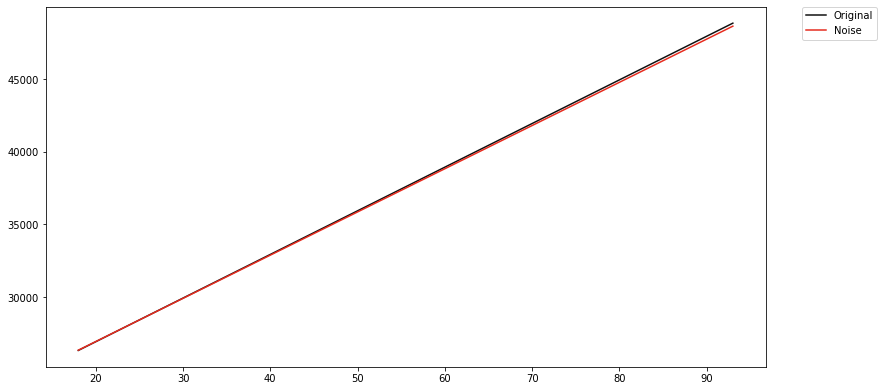

In [16]:
def myfunc(x):
  return slope * x + intercept

def myfunc1(x):
    return slope_1 * x + intercept_1
original = list(map(myfunc, data['age'].to_list()))
noise = list(map(myfunc1, data_40['age'].to_list()))

fig= plt.figure(figsize=(1,1))
axes= fig.add_axes([10,1,10,5])
axes.plot(data['age'].to_list(), original, color='#111111',label = "Original")
axes.plot(data_40['age'].to_list(), noise, color='#e62b1e',label = "Noise")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.show()


In [17]:
from sklearn.metrics import mean_squared_error
import math

In [18]:
math.sqrt(mean_squared_error(data['age'].to_list(), data['income'].to_list()))

61866.18182457198

In [19]:
math.sqrt(mean_squared_error(data_40['age'].to_list(), data_40['income'].to_list()))

61866.0648192933

# Mean in range

In [45]:
import random
data_mean = data.copy()
delta = max(data_mean.loc[data['age'] <= 40]['age']) - min(data_mean.loc[data['age'] <= 40]['age'])

In [46]:
count = len(data_mean.loc[data['age'] <= 40])
count / delta

21.181818181818183

In [59]:
for i in range(len(data_mean)):
    if(data_mean.iat[i,0] == 40):
        data_mean.iat[i,0] += round(random.randint(0,int(count / delta)))

In [60]:
data_mean = data_mean.sort_values(by='age')
map_mean_dict_noise = Map(data_mean['age'])
E_mean_noise = expectation(map_mean_dict_noise)
std_mean_noise = STD(map_mean_dict_noise)
gaussian_mean_list_noise = []
for i in map_mean_dict_noise:
    gaussian_mean_list_noise.append(gaussian_distribution(i, E_mean_noise, std_mean_noise))

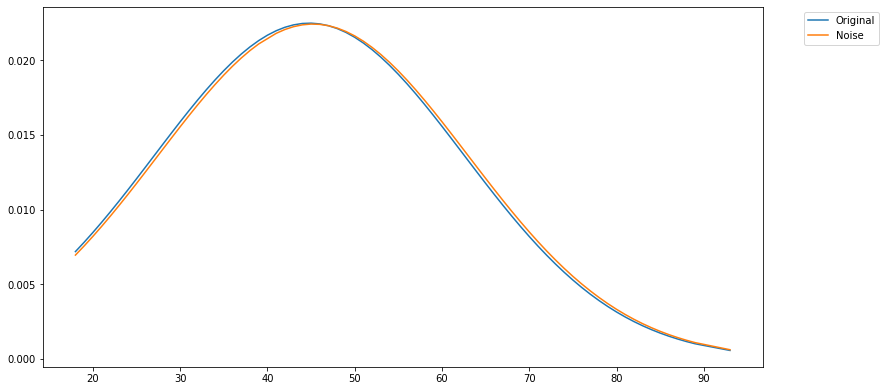

In [61]:
fig= plt.figure(figsize=(1,1))
axes= fig.add_axes([5,5,10,5])
axes.plot(map_dict.keys(), gaussian_list, label = "Original")
axes.plot(map_mean_dict_noise.keys(), gaussian_mean_list_noise, label = "Noise")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

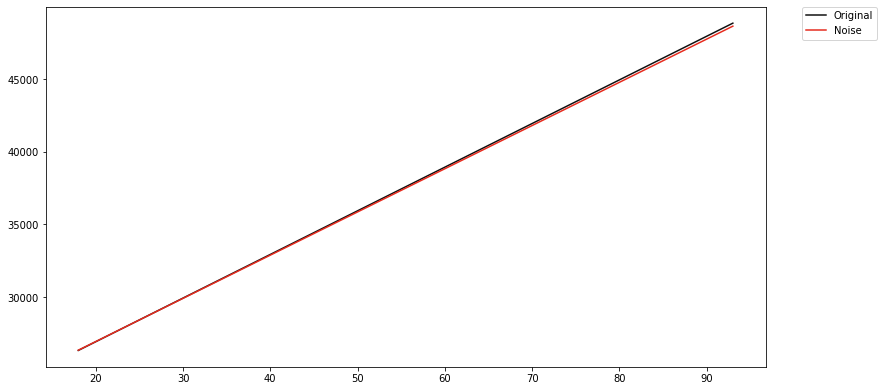

In [63]:
slope_2, intercept_2, r_2, p_2, std_err_2 = stats.linregress(data_mean['age'].to_list(), data_mean['income'].to_list())
def myfunc2(x):
    return slope_2 * x + intercept_2
# original = list(map(myfunc, data['age'].to_list()))
noise_1 = list(map(myfunc1, data_mean['age'].to_list()))

fig= plt.figure(figsize=(1,1))
axes= fig.add_axes([10,1,10,5])
axes.plot(data['age'].to_list(), original, color='#111111',label = "Original")
axes.plot(data_mean['age'].to_list(), noise_1, color='#e62b1e',label = "Noise")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.show()


In [62]:
data_mean.loc[data_mean['age'] == 40]

,age,sex,educ,race,income,married
